In [1]:
import math
import datetime
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import RandomizedSearchCV
import methodsMLinterns

In [2]:
stocks = ['DNB', 'NRG', 'CL', 'ANTM', 'NEE', 'PAYX', 'VAR', 'NI', 'MNST', 'JNJ', 'TGNA', 'NOV', 'FIS', 'BLK', 'HBI', 'NVDA', 'DLTR', 'MRO', 'EMN', 'AMT', 'FLR', 'IBM', 'BK', 'NFX', 'AGN', 'LRCX', 'DIS', 'LH', 'C', 'MNK']

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [4]:
features_1p2_extra = ['acr', 'aeo', 'adl', 'aep', 'acy', 'aez', 'afa', 'aab', 'zkg', 'zmd', 'zla', 'zme', 'zkn', 'zmo', 'zmp', 'zhq', 'zpe']
features_1p4 = ['aab', 'aac', 'aad', 'aae', 'aaf', 'aag', 'aah', 'abj', 'abm', 'abn', 'abo', 'abp', 'abq', 'abr', 'abs', 'abt', 'abu', 'abv', 'abw', 'abx', 'aby', 'abz', 'aca', 'acb', 'acc', 'acd', 'ace', 'acf', 'acr', 'acw', 'acx', 'acy', 'adi', 'adj', 'adl', 'ado', 'adp', 'adq', 'adr', 'ads', 'adt', 'adu', 'adv', 'adw', 'adx', 'ady', 'adz', 'aea', 'aeb', 'aec', 'aed', 'aee', 'aef', 'aeg', 'aeh', 'aei', 'aej', 'aek', 'ael', 'aem', 'aen', 'aeo', 'aep', 'aeq', 'aer', 'aes', 'aex', 'aey', 'aez', 'afa', 'afj', 'afl', 'afo', 'afp', 'afq', 'afr', 'afs', 'aft', 'afu', 'afv', 'afw', 'afx', 'afy', 'afz', 'aga', 'agb', 'agc', 'agd', 'age', 'agf', 'agg', 'agh', 'agi', 'agj', 'agk', 'agl', 'agm', 'agn', 'ago', 'agp', 'agq', 'agr', 'ags', 'agt', 'agu', 'agv', 'agw', 'agx', 'agy', 'ahf', 'ahg', 'ahh', 'ahi', 'ahj', 'ahk', 'ahl', 'ahm', 'ahn', 'aho']
features_1p4_extra =['aab', 'aac', 'aad', 'aae', 'aaf', 'aag', 'aah', 'abj', 'abm', 'abn', 'abo', 'abp', 'abq', 'abr', 'abs', 'abt', 'abu', 'abv', 'abw', 'abx', 'aby', 'abz', 'aca', 'acb', 'acc', 'acd', 'ace', 'acf', 'acr', 'acw', 'acx', 'acy', 'adi', 'adj', 'adl', 'ado', 'adp', 'adq', 'adr', 'ads', 'adt', 'adu', 'adv', 'adw', 'adx', 'ady', 'adz', 'aea', 'aeb', 'aec', 'aed', 'aee', 'aef', 'aeg', 'aeh', 'aei', 'aej', 'aek', 'ael', 'aem', 'aen', 'aeo', 'aep', 'aeq', 'aer', 'aes', 'aex', 'aey', 'aez', 'afa', 'afj', 'afl', 'afo', 'afp', 'afq', 'afr', 'afs', 'aft', 'afu', 'afv', 'afw', 'afx', 'afy', 'afz', 'aga', 'agb', 'agc', 'agd', 'age', 'agf', 'agg', 'agh', 'agi', 'agj', 'agk', 'agl', 'agm', 'agn', 'ago', 'agp', 'agq', 'agr', 'ags', 'agt', 'agu', 'agv', 'agw', 'agx', 'agy', 'ahf', 'ahg', 'ahh', 'ahi', 'ahj', 'ahk', 'ahl', 'ahm', 'ahn', 'aho', 'zhq', 'zhr', 'zhs', 'zht', 'zhu', 'zhv', 'zhw', 'ziy', 'zjb', 'zjc', 'zjd', 'zje', 'zjf', 'zjg', 'zjh', 'zji', 'zjj', 'zjk', 'zjl', 'zjm', 'zjn', 'zjo', 'zjp', 'zjq', 'zjr', 'zjs', 'zjt', 'zju', 'zkg', 'zkl', 'zkm', 'zkn', 'zkx', 'zky', 'zla', 'zld', 'zle', 'zlf', 'zlg', 'zlh', 'zli', 'zlj', 'zlk', 'zll', 'zlm', 'zln', 'zlo', 'zlp', 'zlq', 'zlr', 'zls', 'zlt', 'zlu', 'zlv', 'zlw', 'zlx', 'zly', 'zlz', 'zma', 'zmb', 'zmc', 'zmd', 'zme', 'zmf', 'zmg', 'zmh', 'zmm', 'zmn', 'zmo', 'zmp', 'zmy', 'zna', 'znd', 'zne', 'znf', 'zng', 'znh', 'zni', 'znj', 'znk', 'znl', 'znm', 'znn', 'zno', 'znp', 'znq', 'znr', 'zns', 'znt', 'znu', 'znv', 'znw', 'znx', 'zny', 'znz', 'zoa', 'zob', 'zoc', 'zod', 'zoe', 'zof', 'zog', 'zoh', 'zoi', 'zoj', 'zok', 'zol', 'zom', 'zon', 'zou', 'zov', 'zow', 'zox', 'zoy', 'zoz', 'zpa', 'zpb', 'zpc', 'zpd', 'zpe']

In [5]:
random_state = 0
Cs = np.logspace(-4, 5)
cv = 5
ratio_threshold = 0.65
date_test_set = datetime.date(2016, 1, 1)

In [6]:
clf_portfolio_dic = methodsMLinterns.ClassificationPortfolio(stocks=stocks, minutes_forward=30)
clf_portfolio_dic.loadData()
clf_portfolio_dic.cleanUpData(features_1p4_extra)
clf_portfolio_dic.getTrainTestSetDate(date_test_set)

# Use Keras

In [7]:
from keras.layers import Input, Dense, Activation, Dropout
from keras.models import Model, Sequential
import keras.callbacks
import datetime
from keras.regularizers import l1l2

Using TensorFlow backend.


In [8]:
class autoencoder():
    def __init__(self,encoding_dim=30):
        # size of encoded representations
        self.encoding_dim = encoding_dim

        input_img = Input(shape=(239,))
        encoded = Dense(100, activation='relu')(input_img)
        encoded = Dropout(0.8)(encoded)
        encoded = Dense(encoding_dim, activation='relu',name="encoded")(encoded)
        #encoded = Dropout(0.2)(encoded)
        #encoded = Dense(encoding_dim, activation='relu')(encoded)

        #decoded = Dense(64, activation='relu')(encoded)
        #decoded = Dropout(0.1)(decoded)
        decoded = Dense(100, activation='relu')(encoded)
        decoded = Dropout(0.8)(decoded)
        decoded = Dense(239, activation='relu',name="decoded")(decoded)

        reg = l1l2(l1=10, l2=10)
        logit = Dense(2, input_dim=encoding_dim, activation='softmax', W_regularizer=reg, name="logit")(encoded)

        # this model maps an input to its reconstruction
        # autoencoder = Model(input=input_img, output=decoded)

        # this model maps an input to its encoded representation
        # encoder = Model(input=input_img, output=encoded)

        # placeholder for encoded (32-dimensional) input
        # encoded_input = Input(shape=(encoding_dim,))

        # logistic regression model
        #logistic = Model(input=encoded_input, output=logit)

        # merged model
        self.merged_model = Model(input=input_img, output=[decoded,logit])

        adam = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
        self.merged_model.compile(optimizer=adam, loss={'decoded':'cosine_proximity','logit':'categorical_crossentropy'},
                             loss_weights=[0.5,0.5],metrics={'decoded':'mae','logit':'acc'})
    
    def fit(self, X, y, epochs=100, batch_size=32, callBack=None):
        return self.merged_model.fit(x=X, y=[X,self.onehot(y)],
                     nb_epoch=epochs,
                     batch_size=batch_size,
                     shuffle=True,
                     validation_split=0.2,
                     verbose=3,
                     callbacks=[callBack])
        
    def onehot(self, y):
        y_onehot = np.zeros((y.shape[0], 2))
        y_onehot[np.arange(y.shape[0]), y.astype('int32')] = 1
        return y_onehot
    
    def onehotInv(self, y):
        return y[:,1]

    def predict(self, X):
        return np.argmax(self.predict_proba(X),1)
    
    def predict_proba(self, X):
        return self.merged_model.predict(X)[1]

    def getMergedModel(self):
        return self.merged_model
    

In [9]:
acc_train_autoencoder = np.zeros(clf_portfolio_dic.N_stocks)
acc_test_autoencoder = np.zeros(clf_portfolio_dic.N_stocks)
acc_train_autoencoder30 = np.zeros(clf_portfolio_dic.N_stocks)
acc_test_autoencoder30 = np.zeros(clf_portfolio_dic.N_stocks)
acc_train_autoencoder40 = np.zeros(clf_portfolio_dic.N_stocks)
acc_test_autoencoder40 = np.zeros(clf_portfolio_dic.N_stocks)
acc_train_autoencoder50 = np.zeros(clf_portfolio_dic.N_stocks)
acc_test_autoencoder50 = np.zeros(clf_portfolio_dic.N_stocks)

for k, stock in enumerate(clf_portfolio_dic.stocks):
    name = "%s30"%stock
    log_name = datetime.datetime.today().strftime('%Y-%m-%d_%H:%M')
    tbCallBack = keras.callbacks.TensorBoard(log_dir='/Users/clement/cqc/log/%s_%s'%(name,log_name)
                                      , histogram_freq=0, write_graph=True, write_images=True)
    print(k,name)
    
    auto30 = autoencoder(30)
    auto40 = autoencoder(40)
    auto50 = autoencoder(50)
        
    x_train = np.array(clf_portfolio_dic.X_train_dic[name][features_1p4_extra])
    x_test = np.array(clf_portfolio_dic.X_test_dic[name][features_1p4_extra])
    y_train = (clf_portfolio_dic.y_train_dic[name]+1)/2
    y_test = (clf_portfolio_dic.y_test_dic[name]+1)/2

    auto30.fit(X=x_train, y=y_train,epochs=100,batch_size=256,callBack=tbCallBack)
    auto40.fit(X=x_train, y=y_train,epochs=100,batch_size=256,callBack=tbCallBack)
    auto50.fit(X=x_train, y=y_train,epochs=100,batch_size=256,callBack=tbCallBack)
    
    y_pred_train30 = auto30.predict(x_train)
    y_pred_test30 = auto30.predict(x_test)
    y_pred_train40 = auto40.predict(x_train)
    y_pred_test40 = auto40.predict(x_test)
    y_pred_train50 = auto50.predict(x_train)
    y_pred_test50 = auto50.predict(x_test)
    acc_train30 = (100 * (y_pred_train30 == y_train)).mean()
    acc_test30 = (100 * (y_pred_test30 == y_test)).mean()
    acc_train40 = (100 * (y_pred_train40 == y_train)).mean()
    acc_test40 = (100 * (y_pred_test40 == y_test)).mean()
    acc_train50 = (100 * (y_pred_train50 == y_train)).mean()
    acc_test50 = (100 * (y_pred_test50 == y_test)).mean()
    
    y_pred_train = np.argmax((auto30.predict_proba(x_train)+auto40.predict_proba(x_train)+auto50.predict_proba(x_train)),1)
    y_pred_test = np.argmax((auto30.predict_proba(x_test)+auto40.predict_proba(x_test)+auto50.predict_proba(x_test)),1)
    acc_train = 100 * (y_pred_train == y_train).mean()
    acc_test = 100 * (y_pred_test == y_test).mean()
    
    acc_train_autoencoder30[k] = acc_train30
    acc_test_autoencoder30[k] = acc_test30
    acc_train_autoencoder40[k] = acc_train40
    acc_test_autoencoder40[k] = acc_test40
    acc_train_autoencoder50[k] = acc_train50
    acc_test_autoencoder50[k] = acc_test50
    acc_train_autoencoder[k] = acc_train
    acc_test_autoencoder[k] = acc_test
    
    print(acc_train30,acc_train40,acc_train50,acc_train)
    print(acc_test30,acc_test40,acc_test50,acc_test)

0 DNB30
Train on 4767 samples, validate on 1192 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoc

In [10]:
import pickle
with open("pickles/ensemble_autoencoder.p",'wb') as f:
    pickle.dump( [acc_train_autoencoder30, acc_test_autoencoder30,
                  acc_train_autoencoder40, acc_test_autoencoder40,
                  acc_train_autoencoder50, acc_test_autoencoder50,
                  acc_train_autoencoder,acc_test_autoencoder], f, protocol=pickle.HIGHEST_PROTOCOL)

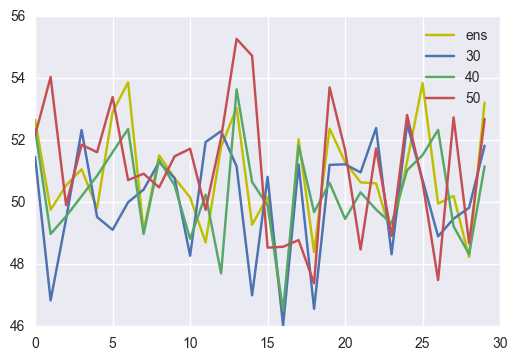

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
leg = ["ens","30","40","50"]
plt.plot(acc_test_autoencoder,color='y')
plt.plot(acc_test_autoencoder30)
plt.plot(acc_test_autoencoder40)
plt.plot(acc_test_autoencoder50)
plt.legend(leg)

## Autoencoder + PCA

DNB n_components 3 accuracy train 52.12 accuracy test 51.76
DNB n_components 5 accuracy train 52.24 accuracy test 53.1
DNB n_components 7 accuracy train 52.36 accuracy test 52.81
DNB n_components 9 accuracy train 53.33 accuracy test 53.25
DNB n_components 11 accuracy train 53.05 accuracy test 53.15
DNB n_components 13 accuracy train 53.26 accuracy test 53.4
DNB n_components 15 accuracy train 53.53 accuracy test 52.81
DNB n_components 17 accuracy train 54.34 accuracy test 53.85
DNB n_components 19 accuracy train 54.02 accuracy test 53.5
DNB n_components 21 accuracy train 54.52 accuracy test 53.65
DNB n_components 23 accuracy train 54.57 accuracy test 53.65
DNB n_components 26 accuracy train 54.82 accuracy test 53.65
DNB n_components 29 accuracy train 54.81 accuracy test 53.25
DNB n_components 33 accuracy train 54.93 accuracy test 52.36
DNB n_components 37 accuracy train 55.01 accuracy test 53.5
DNB n_components 42 accuracy train 55.01 accuracy test 53.3
DNB n_components 48 accuracy trai

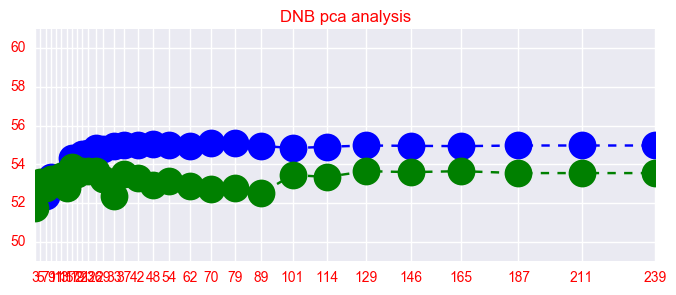

NRG n_components 3 accuracy train 54.45 accuracy test 54.14
NRG n_components 5 accuracy train 54.31 accuracy test 54.24
NRG n_components 7 accuracy train 54.43 accuracy test 54.24
NRG n_components 9 accuracy train 54.24 accuracy test 54.43
NRG n_components 11 accuracy train 54.33 accuracy test 53.46
NRG n_components 13 accuracy train 54.61 accuracy test 53.65
NRG n_components 15 accuracy train 54.63 accuracy test 54.43
NRG n_components 17 accuracy train 54.63 accuracy test 54.43
NRG n_components 19 accuracy train 54.52 accuracy test 55.01
NRG n_components 21 accuracy train 54.7 accuracy test 54.63
NRG n_components 23 accuracy train 54.82 accuracy test 54.33
NRG n_components 26 accuracy train 55.6 accuracy test 53.55
NRG n_components 29 accuracy train 56.48 accuracy test 53.65
NRG n_components 33 accuracy train 56.74 accuracy test 54.04
NRG n_components 37 accuracy train 56.71 accuracy test 53.65
NRG n_components 42 accuracy train 56.78 accuracy test 54.24
NRG n_components 48 accuracy t

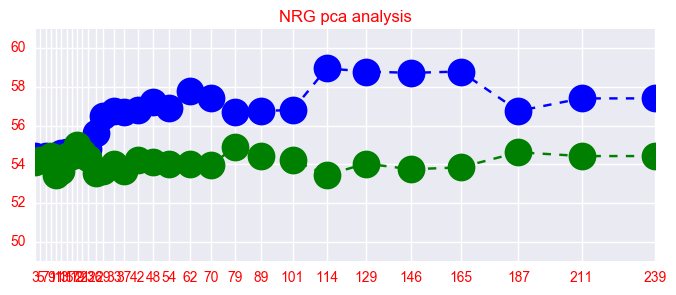

CL n_components 3 accuracy train 52.08 accuracy test 50.54
CL n_components 5 accuracy train 53.38 accuracy test 52.35
CL n_components 7 accuracy train 54.44 accuracy test 50.72
CL n_components 9 accuracy train 54.09 accuracy test 51.72
CL n_components 11 accuracy train 54.09 accuracy test 51.99
CL n_components 13 accuracy train 54.83 accuracy test 51.81
CL n_components 15 accuracy train 54.98 accuracy test 51.99
CL n_components 17 accuracy train 54.95 accuracy test 52.17
CL n_components 19 accuracy train 55.32 accuracy test 49.82
CL n_components 21 accuracy train 54.98 accuracy test 50.72
CL n_components 23 accuracy train 54.56 accuracy test 51.08
CL n_components 26 accuracy train 55.1 accuracy test 51.36
CL n_components 29 accuracy train 55.39 accuracy test 51.08
CL n_components 33 accuracy train 55.88 accuracy test 50.18
CL n_components 37 accuracy train 55.47 accuracy test 51.63
CL n_components 42 accuracy train 56.23 accuracy test 51.72
CL n_components 48 accuracy train 56.1 accura

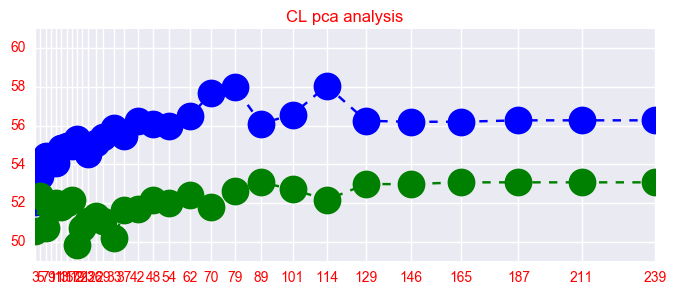

ANTM n_components 3 accuracy train 52.65 accuracy test 46.8
ANTM n_components 5 accuracy train 52.47 accuracy test 47.28
ANTM n_components 7 accuracy train 54.21 accuracy test 49.41
ANTM n_components 9 accuracy train 54.21 accuracy test 46.96
ANTM n_components 11 accuracy train 55.25 accuracy test 49.09
ANTM n_components 13 accuracy train 54.21 accuracy test 48.7
ANTM n_components 15 accuracy train 56.2 accuracy test 48.78
ANTM n_components 17 accuracy train 57.5 accuracy test 49.64
ANTM n_components 19 accuracy train 56.81 accuracy test 48.54
ANTM n_components 21 accuracy train 56.55 accuracy test 49.17
ANTM n_components 23 accuracy train 57.33 accuracy test 49.64
ANTM n_components 26 accuracy train 57.24 accuracy test 49.17
ANTM n_components 29 accuracy train 56.98 accuracy test 48.38
ANTM n_components 33 accuracy train 56.81 accuracy test 48.46
ANTM n_components 37 accuracy train 57.33 accuracy test 47.99
ANTM n_components 42 accuracy train 57.07 accuracy test 48.46
ANTM n_component

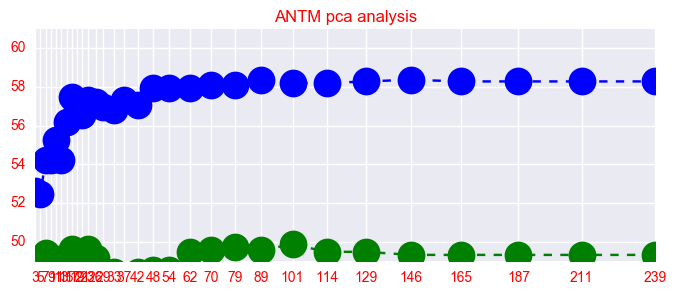

NEE n_components 3 accuracy train 54.56 accuracy test 49.52
NEE n_components 5 accuracy train 54.4 accuracy test 48.1
NEE n_components 7 accuracy train 56.2 accuracy test 49.62
NEE n_components 9 accuracy train 56.02 accuracy test 49.71
NEE n_components 11 accuracy train 56.23 accuracy test 49.81
NEE n_components 13 accuracy train 56.04 accuracy test 49.71
NEE n_components 15 accuracy train 56.34 accuracy test 50.29
NEE n_components 17 accuracy train 55.99 accuracy test 50.29
NEE n_components 19 accuracy train 56.77 accuracy test 51.52
NEE n_components 21 accuracy train 56.34 accuracy test 50.19
NEE n_components 23 accuracy train 56.37 accuracy test 50.38
NEE n_components 26 accuracy train 57.28 accuracy test 50.38
NEE n_components 29 accuracy train 57.31 accuracy test 50.86
NEE n_components 33 accuracy train 57.15 accuracy test 50.29
NEE n_components 37 accuracy train 56.74 accuracy test 50.38
NEE n_components 42 accuracy train 57.23 accuracy test 50.76
NEE n_components 48 accuracy tr

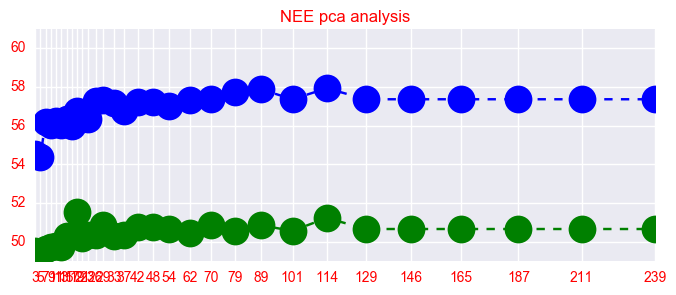

done 20%
PAYX n_components 3 accuracy train 51.31 accuracy test 51.37
PAYX n_components 5 accuracy train 51.8 accuracy test 49.84
PAYX n_components 7 accuracy train 51.69 accuracy test 50.16
PAYX n_components 9 accuracy train 52.92 accuracy test 49.35
PAYX n_components 11 accuracy train 52.9 accuracy test 48.95
PAYX n_components 13 accuracy train 52.69 accuracy test 50.24
PAYX n_components 15 accuracy train 53.69 accuracy test 50.81
PAYX n_components 17 accuracy train 53.48 accuracy test 50.89
PAYX n_components 19 accuracy train 54.18 accuracy test 49.03
PAYX n_components 21 accuracy train 53.8 accuracy test 50.24
PAYX n_components 23 accuracy train 54.15 accuracy test 49.68
PAYX n_components 26 accuracy train 54.18 accuracy test 51.13
PAYX n_components 29 accuracy train 54.18 accuracy test 50.4
PAYX n_components 33 accuracy train 54.78 accuracy test 49.76
PAYX n_components 37 accuracy train 54.15 accuracy test 50.57
PAYX n_components 42 accuracy train 55.22 accuracy test 49.11
PAYX n_

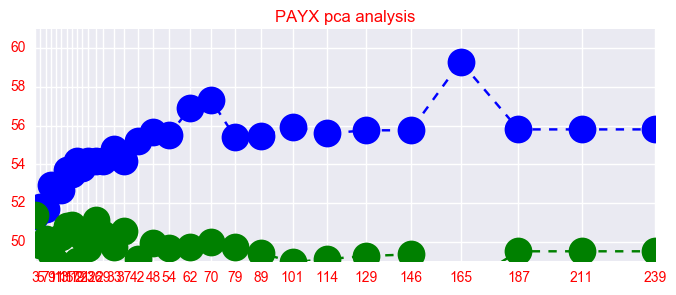

VAR n_components 3 accuracy train 51.68 accuracy test 52.29
VAR n_components 5 accuracy train 52.9 accuracy test 51.93
VAR n_components 7 accuracy train 52.64 accuracy test 51.29
VAR n_components 9 accuracy train 53.48 accuracy test 53.44
VAR n_components 11 accuracy train 54.01 accuracy test 52.29
VAR n_components 13 accuracy train 54.38 accuracy test 54.44
VAR n_components 15 accuracy train 54.14 accuracy test 54.51
VAR n_components 17 accuracy train 54.42 accuracy test 55.16
VAR n_components 19 accuracy train 55.13 accuracy test 54.94
VAR n_components 21 accuracy train 55.26 accuracy test 54.3
VAR n_components 23 accuracy train 55.88 accuracy test 53.65
VAR n_components 26 accuracy train 56.18 accuracy test 54.08
VAR n_components 29 accuracy train 56.24 accuracy test 53.87
VAR n_components 33 accuracy train 56.24 accuracy test 53.87
VAR n_components 37 accuracy train 56.63 accuracy test 52.36
VAR n_components 42 accuracy train 57.12 accuracy test 52.22
VAR n_components 48 accuracy t

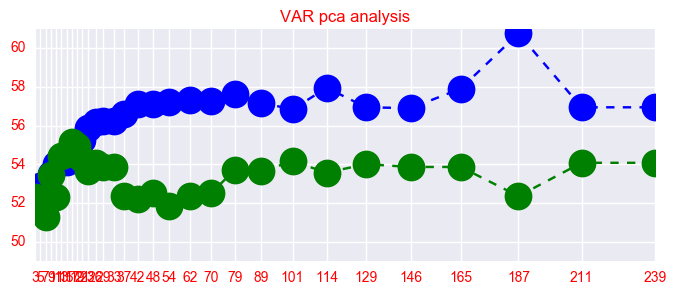

NI n_components 3 accuracy train 52.9 accuracy test 49.39
NI n_components 5 accuracy train 52.82 accuracy test 49.59
NI n_components 7 accuracy train 53.12 accuracy test 50.1
NI n_components 9 accuracy train 53.35 accuracy test 48.87
NI n_components 11 accuracy train 53.25 accuracy test 49.8
NI n_components 13 accuracy train 53.87 accuracy test 48.05
NI n_components 15 accuracy train 53.3 accuracy test 49.69
NI n_components 17 accuracy train 54.55 accuracy test 48.26
NI n_components 19 accuracy train 54.97 accuracy test 48.26
NI n_components 21 accuracy train 55.15 accuracy test 50.1
NI n_components 23 accuracy train 54.9 accuracy test 51.33
NI n_components 26 accuracy train 55.82 accuracy test 51.33
NI n_components 29 accuracy train 56.22 accuracy test 50.41
NI n_components 33 accuracy train 56.8 accuracy test 51.13
NI n_components 37 accuracy train 56.85 accuracy test 51.33
NI n_components 42 accuracy train 56.87 accuracy test 52.77
NI n_components 48 accuracy train 56.85 accuracy te

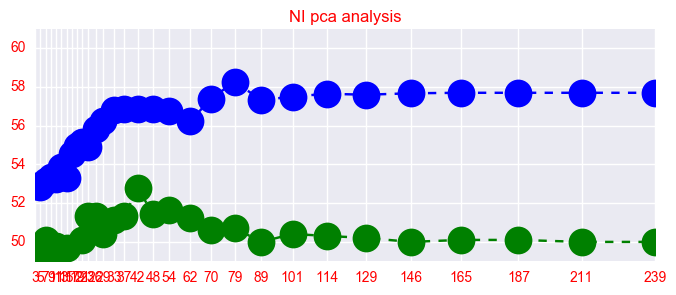

MNST n_components 3 accuracy train 52.79 accuracy test 49.59
MNST n_components 5 accuracy train 52.66 accuracy test 49.82
MNST n_components 7 accuracy train 52.5 accuracy test 50.33
MNST n_components 9 accuracy train 53.37 accuracy test 51.37
MNST n_components 11 accuracy train 53.4 accuracy test 51.15
MNST n_components 13 accuracy train 53.46 accuracy test 51.07
MNST n_components 15 accuracy train 54.38 accuracy test 51.15
MNST n_components 17 accuracy train 54.15 accuracy test 51.37
MNST n_components 19 accuracy train 54.48 accuracy test 50.63
MNST n_components 21 accuracy train 54.29 accuracy test 50.63
MNST n_components 23 accuracy train 54.79 accuracy test 50.18
MNST n_components 26 accuracy train 55.0 accuracy test 50.63
MNST n_components 29 accuracy train 54.94 accuracy test 50.41
MNST n_components 33 accuracy train 54.88 accuracy test 50.92
MNST n_components 37 accuracy train 54.92 accuracy test 50.7
MNST n_components 42 accuracy train 55.21 accuracy test 51.0
MNST n_components

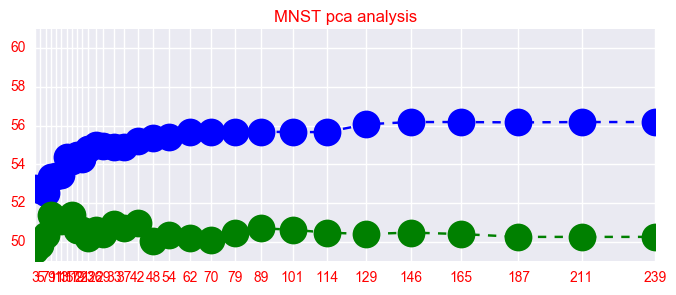

JNJ n_components 3 accuracy train 52.81 accuracy test 49.92
JNJ n_components 5 accuracy train 52.72 accuracy test 50.39
JNJ n_components 7 accuracy train 52.89 accuracy test 50.78
JNJ n_components 9 accuracy train 53.23 accuracy test 49.45
JNJ n_components 11 accuracy train 53.6 accuracy test 49.06
JNJ n_components 13 accuracy train 53.78 accuracy test 48.21
JNJ n_components 15 accuracy train 54.07 accuracy test 48.21
JNJ n_components 17 accuracy train 55.29 accuracy test 49.14
JNJ n_components 19 accuracy train 54.62 accuracy test 48.75
JNJ n_components 21 accuracy train 55.31 accuracy test 48.83
JNJ n_components 23 accuracy train 54.62 accuracy test 50.7
JNJ n_components 26 accuracy train 55.16 accuracy test 49.84
JNJ n_components 29 accuracy train 54.85 accuracy test 50.0
JNJ n_components 33 accuracy train 55.07 accuracy test 48.99
JNJ n_components 37 accuracy train 54.96 accuracy test 49.84
JNJ n_components 42 accuracy train 55.05 accuracy test 49.92
JNJ n_components 48 accuracy tr

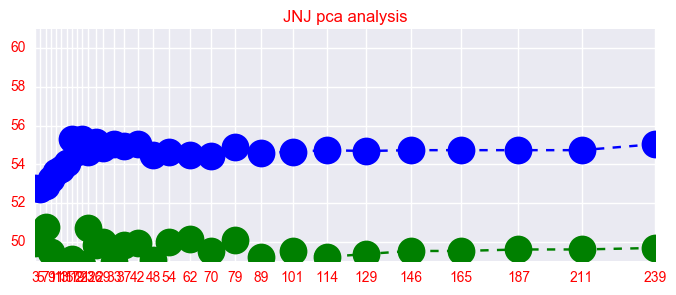

TGNA n_components 3 accuracy train 54.1 accuracy test 48.51
TGNA n_components 5 accuracy train 54.3 accuracy test 48.12
TGNA n_components 7 accuracy train 54.3 accuracy test 48.12
TGNA n_components 9 accuracy train 54.3 accuracy test 48.12
TGNA n_components 11 accuracy train 57.42 accuracy test 50.08
TGNA n_components 13 accuracy train 57.42 accuracy test 49.45
TGNA n_components 15 accuracy train 59.38 accuracy test 50.86
TGNA n_components 17 accuracy train 60.35 accuracy test 50.47
TGNA n_components 19 accuracy train 61.52 accuracy test 50.39
TGNA n_components 21 accuracy train 61.13 accuracy test 49.37
TGNA n_components 23 accuracy train 54.49 accuracy test 48.04
TGNA n_components 26 accuracy train 60.74 accuracy test 49.84
TGNA n_components 29 accuracy train 54.3 accuracy test 48.04
TGNA n_components 33 accuracy train 54.3 accuracy test 48.04
TGNA n_components 37 accuracy train 54.3 accuracy test 48.04
TGNA n_components 42 accuracy train 54.3 accuracy test 48.04
TGNA n_components 48

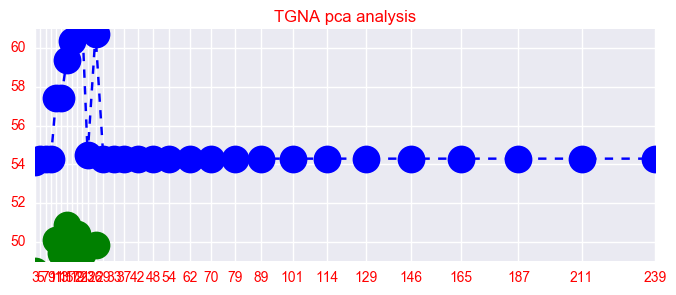

done 40%
NOV n_components 3 accuracy train 51.24 accuracy test 50.73
NOV n_components 5 accuracy train 52.29 accuracy test 52.51
NOV n_components 7 accuracy train 52.24 accuracy test 51.78
NOV n_components 9 accuracy train 53.5 accuracy test 49.6
NOV n_components 11 accuracy train 53.55 accuracy test 49.68
NOV n_components 13 accuracy train 53.86 accuracy test 49.84
NOV n_components 15 accuracy train 54.96 accuracy test 51.62
NOV n_components 17 accuracy train 55.25 accuracy test 51.46
NOV n_components 19 accuracy train 55.49 accuracy test 51.05
NOV n_components 21 accuracy train 55.9 accuracy test 49.92
NOV n_components 23 accuracy train 56.04 accuracy test 49.92
NOV n_components 26 accuracy train 55.88 accuracy test 51.05
NOV n_components 29 accuracy train 55.93 accuracy test 51.94
NOV n_components 33 accuracy train 56.45 accuracy test 51.78
NOV n_components 37 accuracy train 56.61 accuracy test 51.7
NOV n_components 42 accuracy train 56.79 accuracy test 52.1
NOV n_components 48 accu

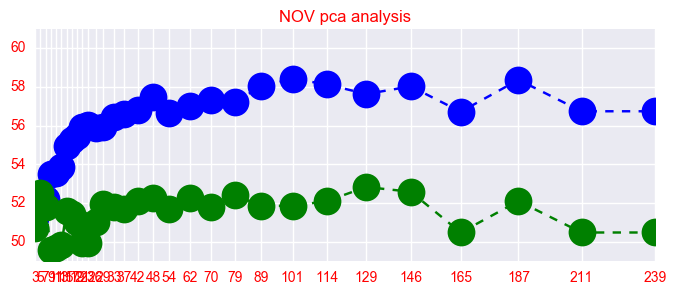

FIS n_components 3 accuracy train 51.03 accuracy test 51.57
FIS n_components 5 accuracy train 51.56 accuracy test 52.08
FIS n_components 7 accuracy train 51.71 accuracy test 51.13
FIS n_components 9 accuracy train 51.18 accuracy test 53.46
FIS n_components 11 accuracy train 51.69 accuracy test 52.08
FIS n_components 13 accuracy train 53.05 accuracy test 52.15
FIS n_components 15 accuracy train 52.92 accuracy test 52.59
FIS n_components 17 accuracy train 53.54 accuracy test 50.04
FIS n_components 19 accuracy train 53.73 accuracy test 49.96
FIS n_components 21 accuracy train 54.24 accuracy test 51.71
FIS n_components 23 accuracy train 54.22 accuracy test 51.2
FIS n_components 26 accuracy train 55.56 accuracy test 50.62
FIS n_components 29 accuracy train 56.22 accuracy test 51.57
FIS n_components 33 accuracy train 56.26 accuracy test 51.57
FIS n_components 37 accuracy train 55.83 accuracy test 51.06
FIS n_components 42 accuracy train 56.24 accuracy test 52.29
FIS n_components 48 accuracy 

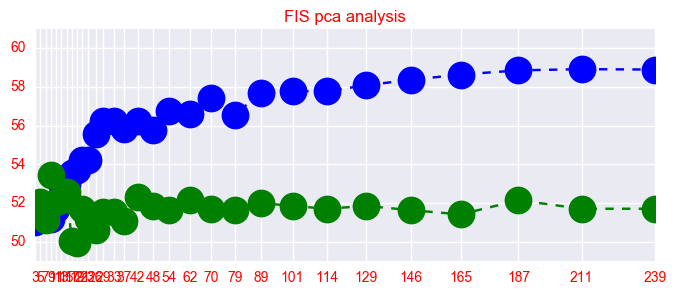

BLK n_components 3 accuracy train 52.37 accuracy test 51.76
BLK n_components 5 accuracy train 54.37 accuracy test 50.39
BLK n_components 7 accuracy train 54.59 accuracy test 51.07
BLK n_components 9 accuracy train 55.5 accuracy test 52.53
BLK n_components 11 accuracy train 56.64 accuracy test 53.73
BLK n_components 13 accuracy train 56.66 accuracy test 53.98
BLK n_components 15 accuracy train 57.02 accuracy test 53.3
BLK n_components 17 accuracy train 57.14 accuracy test 54.76
BLK n_components 19 accuracy train 57.07 accuracy test 53.9
BLK n_components 21 accuracy train 56.95 accuracy test 53.98
BLK n_components 23 accuracy train 57.75 accuracy test 54.07
BLK n_components 26 accuracy train 58.07 accuracy test 53.81
BLK n_components 29 accuracy train 57.75 accuracy test 54.76
BLK n_components 33 accuracy train 57.89 accuracy test 54.33
BLK n_components 37 accuracy train 58.7 accuracy test 55.18
BLK n_components 42 accuracy train 58.82 accuracy test 54.84
BLK n_components 48 accuracy tra

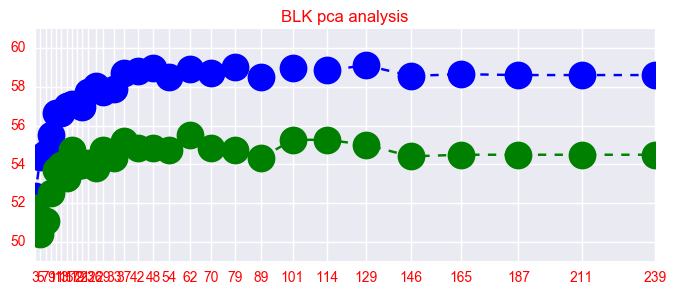

HBI n_components 3 accuracy train 53.73 accuracy test 52.31
HBI n_components 5 accuracy train 53.86 accuracy test 52.17
HBI n_components 7 accuracy train 53.84 accuracy test 51.83
HBI n_components 9 accuracy train 55.79 accuracy test 51.76
HBI n_components 11 accuracy train 55.47 accuracy test 51.9
HBI n_components 13 accuracy train 55.28 accuracy test 52.45
HBI n_components 15 accuracy train 56.19 accuracy test 52.38
HBI n_components 17 accuracy train 55.76 accuracy test 51.55
HBI n_components 19 accuracy train 56.0 accuracy test 51.21
HBI n_components 21 accuracy train 56.53 accuracy test 51.28
HBI n_components 23 accuracy train 56.31 accuracy test 51.48
HBI n_components 26 accuracy train 57.22 accuracy test 51.76
HBI n_components 29 accuracy train 56.93 accuracy test 51.76
HBI n_components 33 accuracy train 56.95 accuracy test 51.62
HBI n_components 37 accuracy train 57.14 accuracy test 51.21
HBI n_components 42 accuracy train 57.16 accuracy test 51.35
HBI n_components 48 accuracy t

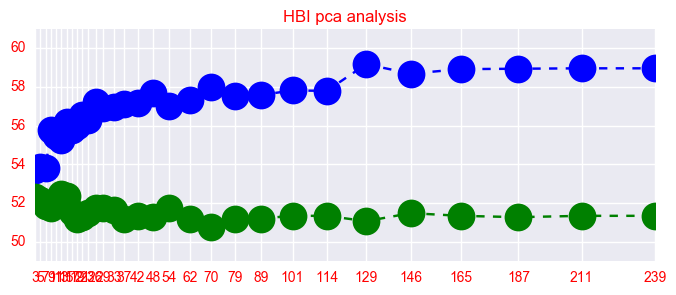

NVDA n_components 3 accuracy train 52.06 accuracy test 53.03
NVDA n_components 5 accuracy train 52.17 accuracy test 53.03
NVDA n_components 7 accuracy train 52.11 accuracy test 52.75
NVDA n_components 9 accuracy train 55.0 accuracy test 51.75
NVDA n_components 11 accuracy train 55.23 accuracy test 51.96
NVDA n_components 13 accuracy train 55.57 accuracy test 52.46
NVDA n_components 15 accuracy train 55.23 accuracy test 52.68
NVDA n_components 17 accuracy train 55.11 accuracy test 53.1
NVDA n_components 19 accuracy train 56.4 accuracy test 52.32
NVDA n_components 21 accuracy train 55.88 accuracy test 50.11
NVDA n_components 23 accuracy train 56.24 accuracy test 50.68
NVDA n_components 26 accuracy train 56.6 accuracy test 51.68
NVDA n_components 29 accuracy train 56.7 accuracy test 51.03
NVDA n_components 33 accuracy train 56.7 accuracy test 52.61
NVDA n_components 37 accuracy train 56.7 accuracy test 52.61
NVDA n_components 42 accuracy train 56.78 accuracy test 52.11
NVDA n_components 4

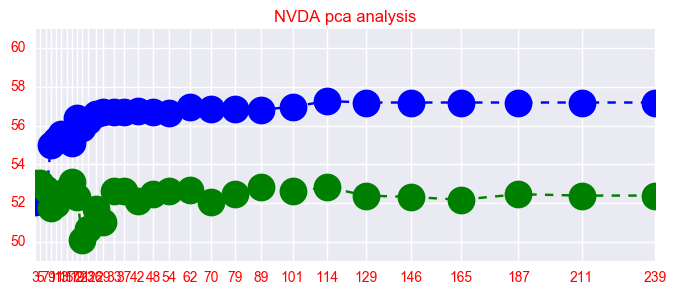

DLTR n_components 3 accuracy train 50.72 accuracy test 52.26
DLTR n_components 5 accuracy train 51.99 accuracy test 49.71
DLTR n_components 7 accuracy train 52.24 accuracy test 51.27
DLTR n_components 9 accuracy train 52.5 accuracy test 50.62
DLTR n_components 11 accuracy train 52.98 accuracy test 50.7
DLTR n_components 13 accuracy train 53.09 accuracy test 50.62
DLTR n_components 15 accuracy train 52.9 accuracy test 50.37
DLTR n_components 17 accuracy train 53.03 accuracy test 49.96
DLTR n_components 19 accuracy train 53.83 accuracy test 51.19
DLTR n_components 21 accuracy train 54.17 accuracy test 50.04
DLTR n_components 23 accuracy train 54.28 accuracy test 50.62
DLTR n_components 26 accuracy train 54.72 accuracy test 49.55
DLTR n_components 29 accuracy train 53.75 accuracy test 49.63
DLTR n_components 33 accuracy train 54.74 accuracy test 49.22
DLTR n_components 37 accuracy train 55.48 accuracy test 49.47
DLTR n_components 42 accuracy train 55.5 accuracy test 48.73
DLTR n_component

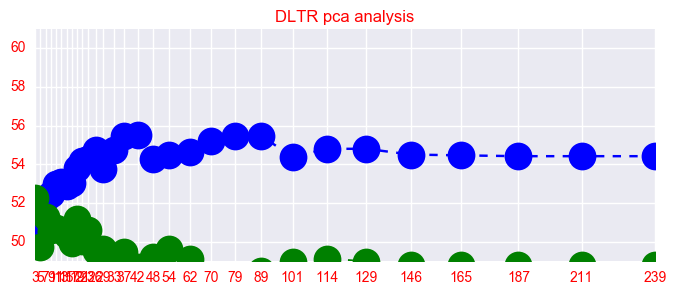

done 60%
MRO n_components 3 accuracy train 50.73 accuracy test 49.7
MRO n_components 5 accuracy train 50.75 accuracy test 47.97
MRO n_components 7 accuracy train 52.18 accuracy test 50.81
MRO n_components 9 accuracy train 52.16 accuracy test 50.0
MRO n_components 11 accuracy train 52.69 accuracy test 51.22
MRO n_components 13 accuracy train 53.22 accuracy test 50.2
MRO n_components 15 accuracy train 53.8 accuracy test 50.71
MRO n_components 17 accuracy train 54.3 accuracy test 51.12
MRO n_components 19 accuracy train 54.51 accuracy test 50.81
MRO n_components 21 accuracy train 54.46 accuracy test 50.81
MRO n_components 23 accuracy train 54.96 accuracy test 50.91
MRO n_components 26 accuracy train 54.56 accuracy test 51.02
MRO n_components 29 accuracy train 54.27 accuracy test 51.52
MRO n_components 33 accuracy train 54.91 accuracy test 51.22
MRO n_components 37 accuracy train 55.36 accuracy test 50.71
MRO n_components 42 accuracy train 55.09 accuracy test 52.03
MRO n_components 48 accu

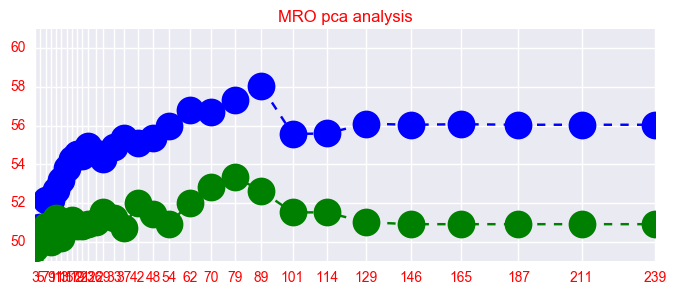

EMN n_components 3 accuracy train 52.63 accuracy test 51.42
EMN n_components 5 accuracy train 53.06 accuracy test 50.23
EMN n_components 7 accuracy train 53.83 accuracy test 49.5
EMN n_components 9 accuracy train 54.04 accuracy test 51.97
EMN n_components 11 accuracy train 53.73 accuracy test 51.79
EMN n_components 13 accuracy train 54.09 accuracy test 51.97
EMN n_components 15 accuracy train 54.09 accuracy test 52.25
EMN n_components 17 accuracy train 54.35 accuracy test 51.97
EMN n_components 19 accuracy train 54.16 accuracy test 52.15
EMN n_components 21 accuracy train 54.45 accuracy test 52.06
EMN n_components 23 accuracy train 54.28 accuracy test 51.42
EMN n_components 26 accuracy train 54.5 accuracy test 51.79
EMN n_components 29 accuracy train 54.98 accuracy test 51.33
EMN n_components 33 accuracy train 54.78 accuracy test 51.24
EMN n_components 37 accuracy train 54.74 accuracy test 51.79
EMN n_components 42 accuracy train 54.62 accuracy test 51.15
EMN n_components 48 accuracy t

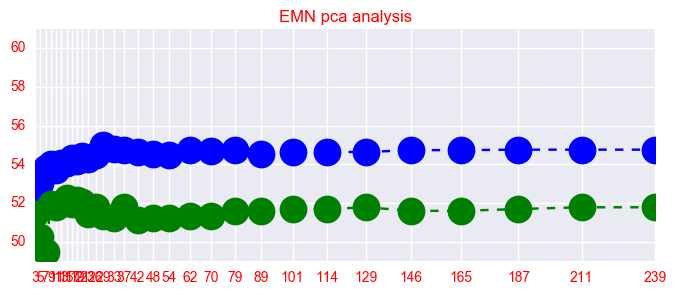

AMT n_components 3 accuracy train 52.62 accuracy test 50.04
AMT n_components 5 accuracy train 52.5 accuracy test 50.37
AMT n_components 7 accuracy train 52.08 accuracy test 49.13
AMT n_components 9 accuracy train 54.01 accuracy test 51.96
AMT n_components 11 accuracy train 54.67 accuracy test 52.29
AMT n_components 13 accuracy train 54.82 accuracy test 52.62
AMT n_components 15 accuracy train 55.27 accuracy test 52.62
AMT n_components 17 accuracy train 55.76 accuracy test 52.37
AMT n_components 19 accuracy train 56.13 accuracy test 53.21
AMT n_components 21 accuracy train 56.06 accuracy test 53.87
AMT n_components 23 accuracy train 55.84 accuracy test 53.21
AMT n_components 26 accuracy train 56.45 accuracy test 53.96
AMT n_components 29 accuracy train 56.16 accuracy test 53.04
AMT n_components 33 accuracy train 56.28 accuracy test 52.37
AMT n_components 37 accuracy train 56.63 accuracy test 52.79
AMT n_components 42 accuracy train 57.44 accuracy test 54.2
AMT n_components 48 accuracy t

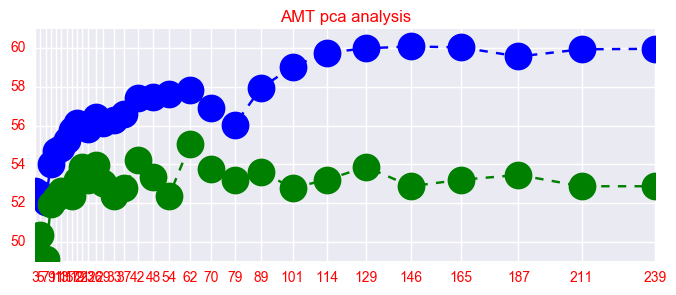

FLR n_components 3 accuracy train 52.12 accuracy test 49.0
FLR n_components 5 accuracy train 51.55 accuracy test 49.08
FLR n_components 7 accuracy train 53.35 accuracy test 51.07
FLR n_components 9 accuracy train 54.16 accuracy test 52.76
FLR n_components 11 accuracy train 54.33 accuracy test 51.68
FLR n_components 13 accuracy train 54.16 accuracy test 51.15
FLR n_components 15 accuracy train 53.95 accuracy test 51.61
FLR n_components 17 accuracy train 54.92 accuracy test 50.54
FLR n_components 19 accuracy train 55.59 accuracy test 50.61
FLR n_components 21 accuracy train 55.73 accuracy test 50.69
FLR n_components 23 accuracy train 55.85 accuracy test 49.77
FLR n_components 26 accuracy train 56.16 accuracy test 50.0
FLR n_components 29 accuracy train 55.94 accuracy test 51.3
FLR n_components 33 accuracy train 55.87 accuracy test 50.08
FLR n_components 37 accuracy train 56.56 accuracy test 50.84
FLR n_components 42 accuracy train 56.09 accuracy test 51.84
FLR n_components 48 accuracy tr

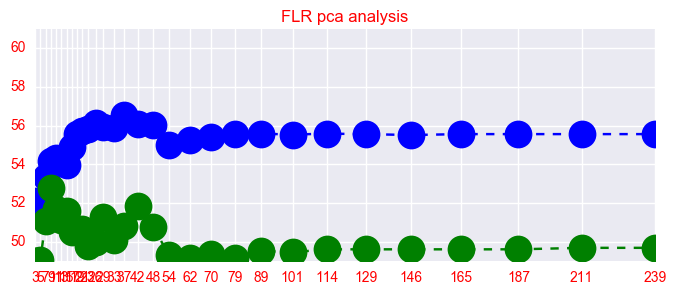

IBM n_components 3 accuracy train 50.67 accuracy test 53.37
IBM n_components 5 accuracy train 53.76 accuracy test 52.65
IBM n_components 7 accuracy train 53.91 accuracy test 52.17
IBM n_components 9 accuracy train 54.65 accuracy test 52.33
IBM n_components 11 accuracy train 54.67 accuracy test 52.01
IBM n_components 13 accuracy train 53.89 accuracy test 51.44
IBM n_components 15 accuracy train 53.98 accuracy test 51.61
IBM n_components 17 accuracy train 54.56 accuracy test 52.49
IBM n_components 19 accuracy train 55.45 accuracy test 51.28
IBM n_components 21 accuracy train 55.38 accuracy test 51.44
IBM n_components 23 accuracy train 55.49 accuracy test 51.69
IBM n_components 26 accuracy train 55.52 accuracy test 51.85
IBM n_components 29 accuracy train 55.69 accuracy test 50.4
IBM n_components 33 accuracy train 55.65 accuracy test 50.8
IBM n_components 37 accuracy train 55.6 accuracy test 49.68
IBM n_components 42 accuracy train 55.81 accuracy test 49.76
IBM n_components 48 accuracy tr

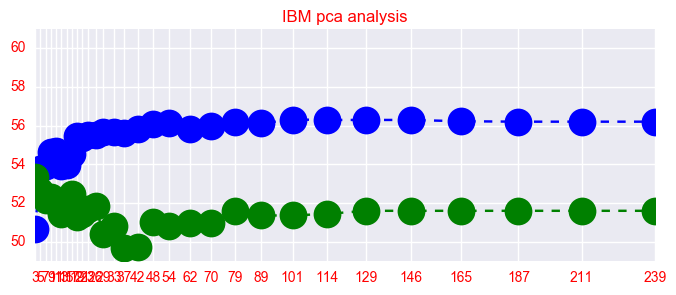

BK n_components 3 accuracy train 51.99 accuracy test 48.45
BK n_components 5 accuracy train 52.87 accuracy test 46.95
BK n_components 7 accuracy train 53.47 accuracy test 48.36
BK n_components 9 accuracy train 54.43 accuracy test 53.52
BK n_components 11 accuracy train 54.54 accuracy test 52.96
BK n_components 13 accuracy train 55.23 accuracy test 52.11
BK n_components 15 accuracy train 55.34 accuracy test 52.77
BK n_components 17 accuracy train 55.34 accuracy test 52.68
BK n_components 19 accuracy train 55.94 accuracy test 52.3
BK n_components 21 accuracy train 56.19 accuracy test 53.99
BK n_components 23 accuracy train 55.94 accuracy test 52.49
BK n_components 26 accuracy train 56.46 accuracy test 53.05
BK n_components 29 accuracy train 56.38 accuracy test 52.77
BK n_components 33 accuracy train 56.52 accuracy test 52.02
BK n_components 37 accuracy train 56.65 accuracy test 51.64
BK n_components 42 accuracy train 56.84 accuracy test 51.74
BK n_components 48 accuracy train 56.82 accur

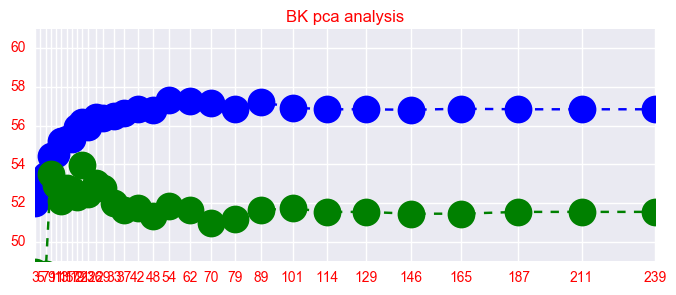

done 80%
NFX n_components 3 accuracy train 51.27 accuracy test 53.16
NFX n_components 5 accuracy train 51.97 accuracy test 52.86
NFX n_components 7 accuracy train 51.67 accuracy test 52.37
NFX n_components 9 accuracy train 52.63 accuracy test 51.08
NFX n_components 11 accuracy train 52.98 accuracy test 50.79
NFX n_components 13 accuracy train 52.78 accuracy test 50.49
NFX n_components 15 accuracy train 53.97 accuracy test 53.45
NFX n_components 17 accuracy train 53.87 accuracy test 52.37
NFX n_components 19 accuracy train 53.95 accuracy test 53.16
NFX n_components 21 accuracy train 55.01 accuracy test 52.56
NFX n_components 23 accuracy train 54.88 accuracy test 53.06
NFX n_components 26 accuracy train 55.03 accuracy test 53.45
NFX n_components 29 accuracy train 55.13 accuracy test 52.66
NFX n_components 33 accuracy train 55.5 accuracy test 52.86
NFX n_components 37 accuracy train 56.37 accuracy test 51.68
NFX n_components 42 accuracy train 56.57 accuracy test 52.76
NFX n_components 48 

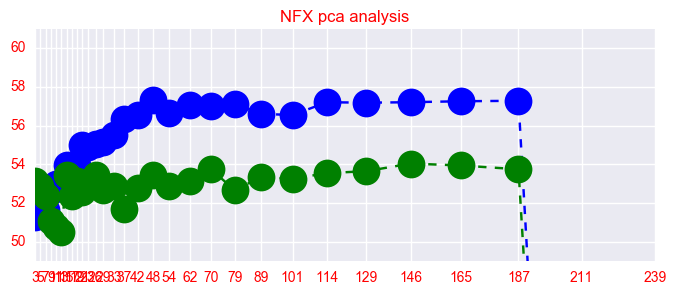

AGN n_components 3 accuracy train 53.36 accuracy test 51.03
AGN n_components 5 accuracy train 55.32 accuracy test 52.46
AGN n_components 7 accuracy train 55.39 accuracy test 53.1
AGN n_components 9 accuracy train 56.04 accuracy test 52.67
AGN n_components 11 accuracy train 56.12 accuracy test 52.25
AGN n_components 13 accuracy train 56.2 accuracy test 53.1
AGN n_components 15 accuracy train 55.42 accuracy test 52.89
AGN n_components 17 accuracy train 56.17 accuracy test 53.03
AGN n_components 19 accuracy train 56.22 accuracy test 52.6
AGN n_components 21 accuracy train 56.42 accuracy test 51.6
AGN n_components 23 accuracy train 57.18 accuracy test 51.39
AGN n_components 26 accuracy train 57.02 accuracy test 52.32
AGN n_components 29 accuracy train 56.42 accuracy test 52.6
AGN n_components 33 accuracy train 56.57 accuracy test 52.74
AGN n_components 37 accuracy train 56.9 accuracy test 52.32
AGN n_components 42 accuracy train 56.97 accuracy test 52.32
AGN n_components 48 accuracy train 

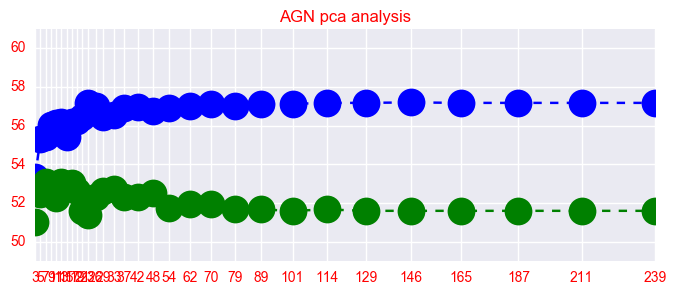

LRCX n_components 3 accuracy train 51.75 accuracy test 52.72
LRCX n_components 5 accuracy train 52.4 accuracy test 51.12
LRCX n_components 7 accuracy train 53.28 accuracy test 51.44
LRCX n_components 9 accuracy train 52.91 accuracy test 51.04
LRCX n_components 11 accuracy train 53.56 accuracy test 49.12
LRCX n_components 13 accuracy train 53.51 accuracy test 51.04
LRCX n_components 15 accuracy train 53.93 accuracy test 50.8
LRCX n_components 17 accuracy train 54.76 accuracy test 50.24
LRCX n_components 19 accuracy train 54.67 accuracy test 50.0
LRCX n_components 21 accuracy train 55.34 accuracy test 50.72
LRCX n_components 23 accuracy train 55.29 accuracy test 51.6
LRCX n_components 26 accuracy train 55.76 accuracy test 51.28
LRCX n_components 29 accuracy train 55.73 accuracy test 50.64
LRCX n_components 33 accuracy train 56.01 accuracy test 52.88
LRCX n_components 37 accuracy train 56.4 accuracy test 52.08
LRCX n_components 42 accuracy train 55.66 accuracy test 51.36
LRCX n_components

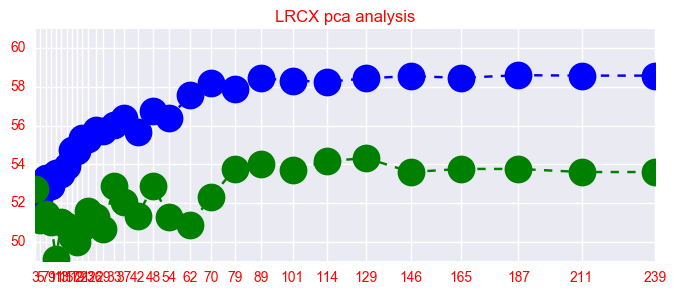

DIS n_components 3 accuracy train 52.95 accuracy test 53.22
DIS n_components 5 accuracy train 52.6 accuracy test 52.25
DIS n_components 7 accuracy train 52.51 accuracy test 51.01
DIS n_components 9 accuracy train 52.65 accuracy test 51.98
DIS n_components 11 accuracy train 52.24 accuracy test 50.66
DIS n_components 13 accuracy train 53.79 accuracy test 51.37
DIS n_components 15 accuracy train 55.09 accuracy test 51.45
DIS n_components 17 accuracy train 55.46 accuracy test 51.28
DIS n_components 19 accuracy train 55.28 accuracy test 50.66
DIS n_components 21 accuracy train 55.0 accuracy test 49.96
DIS n_components 23 accuracy train 55.19 accuracy test 50.31
DIS n_components 26 accuracy train 54.82 accuracy test 51.37
DIS n_components 29 accuracy train 55.44 accuracy test 50.84
DIS n_components 33 accuracy train 55.66 accuracy test 51.37
DIS n_components 37 accuracy train 55.92 accuracy test 50.93
DIS n_components 42 accuracy train 55.73 accuracy test 51.19
DIS n_components 48 accuracy t

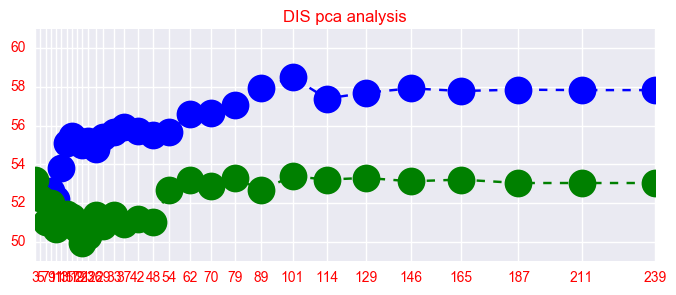

LH n_components 3 accuracy train 52.16 accuracy test 51.68
LH n_components 5 accuracy train 52.86 accuracy test 53.15
LH n_components 7 accuracy train 53.21 accuracy test 53.56
LH n_components 9 accuracy train 54.03 accuracy test 52.58
LH n_components 11 accuracy train 53.97 accuracy test 53.39
LH n_components 13 accuracy train 54.21 accuracy test 53.07
LH n_components 15 accuracy train 55.26 accuracy test 53.56
LH n_components 17 accuracy train 55.01 accuracy test 53.56
LH n_components 19 accuracy train 55.3 accuracy test 53.56
LH n_components 21 accuracy train 55.48 accuracy test 53.72
LH n_components 23 accuracy train 55.99 accuracy test 54.37
LH n_components 26 accuracy train 56.34 accuracy test 54.46
LH n_components 29 accuracy train 55.75 accuracy test 55.44
LH n_components 33 accuracy train 55.99 accuracy test 53.8
LH n_components 37 accuracy train 56.3 accuracy test 55.03
LH n_components 42 accuracy train 56.88 accuracy test 54.7
LH n_components 48 accuracy train 57.08 accuracy

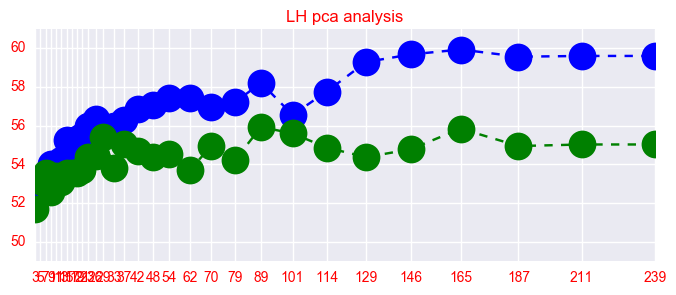

C n_components 3 accuracy train 52.66 accuracy test 49.29
C n_components 5 accuracy train 53.42 accuracy test 50.26
C n_components 7 accuracy train 52.68 accuracy test 51.06
C n_components 9 accuracy train 52.96 accuracy test 50.53
C n_components 11 accuracy train 52.8 accuracy test 51.94
C n_components 13 accuracy train 53.05 accuracy test 52.2
C n_components 15 accuracy train 52.8 accuracy test 51.59
C n_components 17 accuracy train 52.89 accuracy test 52.38
C n_components 19 accuracy train 52.87 accuracy test 51.68
C n_components 21 accuracy train 53.01 accuracy test 51.5
C n_components 23 accuracy train 52.87 accuracy test 51.15
C n_components 26 accuracy train 53.17 accuracy test 50.88
C n_components 29 accuracy train 55.03 accuracy test 48.94
C n_components 33 accuracy train 54.66 accuracy test 48.77
C n_components 37 accuracy train 54.85 accuracy test 48.59
C n_components 42 accuracy train 55.57 accuracy test 48.41
C n_components 48 accuracy train 55.92 accuracy test 50.35
C n_c

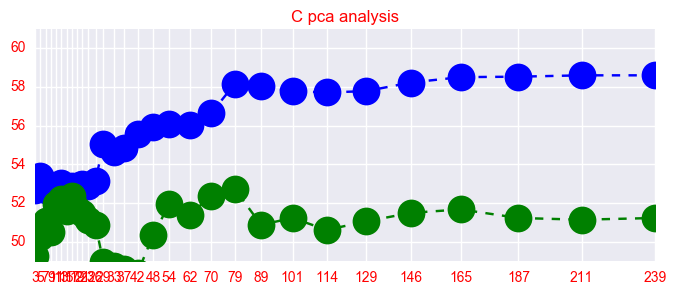

done 100%
MNK n_components 3 accuracy train 53.81 accuracy test 53.48
MNK n_components 5 accuracy train 54.16 accuracy test 52.49
MNK n_components 7 accuracy train 54.01 accuracy test 53.15
MNK n_components 9 accuracy train 54.24 accuracy test 53.62
MNK n_components 11 accuracy train 54.13 accuracy test 53.48
MNK n_components 13 accuracy train 54.1 accuracy test 53.95
MNK n_components 15 accuracy train 54.51 accuracy test 53.95
MNK n_components 17 accuracy train 54.77 accuracy test 53.42
MNK n_components 19 accuracy train 55.79 accuracy test 52.42
MNK n_components 21 accuracy train 56.26 accuracy test 51.63
MNK n_components 23 accuracy train 55.0 accuracy test 53.22
MNK n_components 26 accuracy train 56.11 accuracy test 52.42
MNK n_components 29 accuracy train 55.56 accuracy test 53.22
MNK n_components 33 accuracy train 55.76 accuracy test 53.15
MNK n_components 37 accuracy train 56.28 accuracy test 52.95
MNK n_components 42 accuracy train 56.08 accuracy test 52.95
MNK n_components 48 

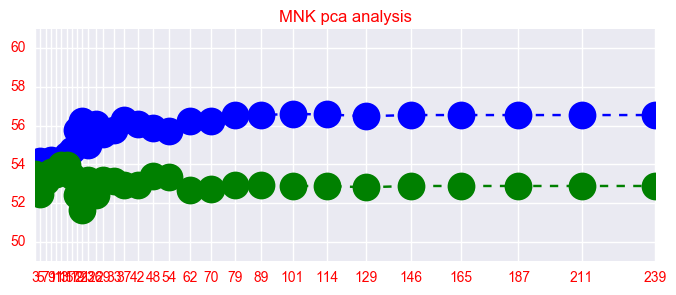

In [9]:
a1 = np.arange(3, len(features_1p4_extra)+1, 2)
a2 = np.logspace(1, math.log(len(features_1p4_extra),2), num=40, base=2).astype('int32')
n_components_vec_1p4_extra = np.concatenate((a1[:10],a2[20:]),axis=0)

clf = LogisticRegressionCV(Cs=Cs, cv=cv, refit=True)
acc_train_pca1, acc_test_pca1 = clf_portfolio_dic.getModelPCA(clf, features_1p4_extra, n_components_vec_1p4_extra)

In [10]:
best_pca_components1 = n_components_vec_1p4_extra[np.argmax(acc_test_pca1,1)]

In [11]:
acc_train_autoencoder = np.zeros(clf_portfolio_dic.N_stocks)
acc_test_autoencoder = np.zeros(clf_portfolio_dic.N_stocks)
acc_train_autoencoder30 = np.zeros(clf_portfolio_dic.N_stocks)
acc_test_autoencoder30 = np.zeros(clf_portfolio_dic.N_stocks)
acc_train_autoencoder40 = np.zeros(clf_portfolio_dic.N_stocks)
acc_test_autoencoder40 = np.zeros(clf_portfolio_dic.N_stocks)
acc_train_autoencoder50 = np.zeros(clf_portfolio_dic.N_stocks)
acc_test_autoencoder50 = np.zeros(clf_portfolio_dic.N_stocks)
acc_train_autoencoder_pca = np.zeros(clf_portfolio_dic.N_stocks)
acc_test_autoencoder_pca = np.zeros(clf_portfolio_dic.N_stocks)

for k, stock in enumerate(clf_portfolio_dic.stocks):
    name = "%s30"%stock
    log_name = datetime.datetime.today().strftime('%Y-%m-%d_%H:%M')
    tbCallBack = keras.callbacks.TensorBoard(log_dir='/Users/clement/cqc/log/%s_%s'%(name,log_name)
                                      , histogram_freq=0, write_graph=True, write_images=True)
    print(k,name)
    
    auto30 = autoencoder(30)
    auto40 = autoencoder(40)
    auto50 = autoencoder(50)
    pca = methodsMLinterns.LogisticClassifierPCA(pcaComponents=best_pca_components1[k])


    x_train = np.array(clf_portfolio_dic.X_train_dic[name][features_1p4_extra])
    x_test = np.array(clf_portfolio_dic.X_test_dic[name][features_1p4_extra])
    y_train = (clf_portfolio_dic.y_train_dic[name]+1)/2
    y_test = (clf_portfolio_dic.y_test_dic[name]+1)/2

    auto30.fit(X=x_train, y=y_train,epochs=100,batch_size=256,callBack=tbCallBack)
    auto40.fit(X=x_train, y=y_train,epochs=100,batch_size=256,callBack=tbCallBack)
    auto50.fit(X=x_train, y=y_train,epochs=100,batch_size=256,callBack=tbCallBack)
    pca.fit(x_train,y_train)
    
    y_pred_train30 = auto30.predict(x_train)
    y_pred_test30 = auto30.predict(x_test)
    y_pred_train40 = auto40.predict(x_train)
    y_pred_test40 = auto40.predict(x_test)
    y_pred_train50 = auto50.predict(x_train)
    y_pred_test50 = auto50.predict(x_test)
    y_pred_train_pca = pca.predict(x_train)
    y_pred_test_pca = pca.predict(x_test)
    
    acc_train30 = (100 * (y_pred_train30 == y_train)).mean()
    acc_test30 = (100 * (y_pred_test30 == y_test)).mean()
    acc_train40 = (100 * (y_pred_train40 == y_train)).mean()
    acc_test40 = (100 * (y_pred_test40 == y_test)).mean()
    acc_train50 = (100 * (y_pred_train50 == y_train)).mean()
    acc_test50 = (100 * (y_pred_test50 == y_test)).mean()
    acc_train_pca = (100 * (y_pred_train_pca == y_train)).mean()
    acc_test_pca = (100 * (y_pred_test_pca == y_test)).mean()
    
    y_pred_train = np.argmax((auto30.predict_proba(x_train)+auto40.predict_proba(x_train)+
                              auto50.predict_proba(x_train)+pca.predict_proba(x_train)),1)
    y_pred_test = np.argmax((auto30.predict_proba(x_test)+auto40.predict_proba(x_test)+
                             auto50.predict_proba(x_test)+pca.predict_proba(x_test)),1)
    acc_train = 100 * (y_pred_train == y_train).mean()
    acc_test = 100 * (y_pred_test == y_test).mean()
    
    acc_train_autoencoder30[k] = acc_train30
    acc_test_autoencoder30[k] = acc_test30
    acc_train_autoencoder40[k] = acc_train40
    acc_test_autoencoder40[k] = acc_test40
    acc_train_autoencoder50[k] = acc_train50
    acc_test_autoencoder50[k] = acc_test50
    acc_train_autoencoder_pca[k] = acc_train_pca
    acc_test_autoencoder_pca[k] = acc_test_pca
    acc_train_autoencoder[k] = acc_train
    acc_test_autoencoder[k] = acc_test
    
    print(acc_train30,acc_train40,acc_train50,acc_train_pca,acc_train)
    print(acc_test30,acc_test40,acc_test50,acc_test_pca,acc_test)

0 DNB30
Train on 4767 samples, validate on 1192 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoc

In [12]:
import pickle
with open("pickles/ensemble_autoencoder_pca.p",'wb') as f:
    pickle.dump( [acc_train_autoencoder30, acc_test_autoencoder30,
                  acc_train_autoencoder40, acc_test_autoencoder40,
                  acc_train_autoencoder50, acc_test_autoencoder50,
                  acc_train_autoencoder_pca, acc_test_autoencoder_pca,
                  acc_train_autoencoder,acc_test_autoencoder], f, protocol=pickle.HIGHEST_PROTOCOL)

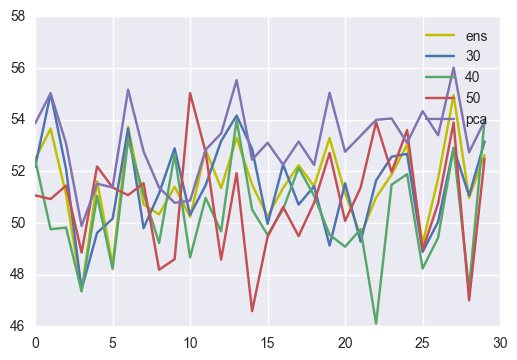

In [13]:
leg = ["ens","30","40","50","pca"]
plt.plot(acc_test_autoencoder,color='y')
plt.plot(acc_test_autoencoder30)
plt.plot(acc_test_autoencoder40)
plt.plot(acc_test_autoencoder50)
plt.plot(acc_test_autoencoder_pca)
plt.legend(leg)